# Assignment # 1
Ivana Nworah Bortot, Irene Avezzù

## 1. Similarity and Distance Measures Between Data

Do the same of exercise 1 in Lab 2 with the digits dataset. This dataset can be downloaded and inspected with the Sklearn APIs. However, it has a different format with respect to the `train_catvnoncat.h5` dataset.

Try to understand the data format by using the following code:

(1797, 64)


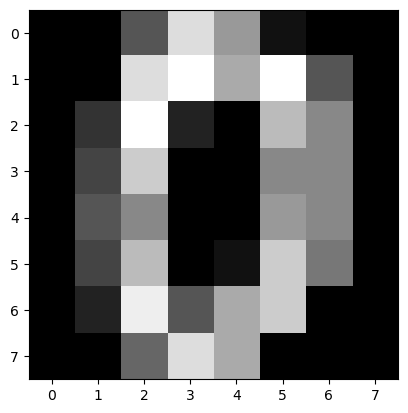

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.data.shape)

plt.gray()

plt.imshow(digits.images[0])

You can use the code written for the `L1`, `L2` and `cosine` metrics. However, the code for the `top1Similarity` has to be sligthly modified. In this new version, the flattened version of the dataset is a matrix where each row is an image index and the columns are the pixel values. Notice that digit images have only one channel.

Answer the following question by properly coding, testing and discussing:
- for each digit from 0 to 9, are the L1, L2 and cosine similarity able to return similar images? That is, an image containing the same digit.

In [2]:
import numpy as np

In [3]:
print (f"images shape: {digits.images.shape}")

dataset_flatten = digits.images.reshape(-1, digits.images.shape[0]).T

print (f"images flatten shape: {dataset_flatten.shape}")

images shape: (1797, 8, 8)
images flatten shape: (1797, 64)


In [4]:
#L1 Metric

from math import *

def L1(x1, x2):
    """
    Arguments:
    x1 -- vector of size m 
    x2 -- vector of size m 
    
    Returns:
    distance -- the L1 distance between the two vectors
    """

    x1 = x1.astype(np.int64)
    x2 = x2.astype(np.int64)

    distanceL1 = np.sum(np.abs(x2 - x1))
    return distanceL1

In [5]:
# L2 Metric

def L2(x1, x2):
    """
    Arguments:
    x1 -- vector of size m 
    x2 -- vector of size m 
    
    Returns:
    distance -- the L2 distance between the two vectors
    """
    
    x1 = x1.astype(np.int64)
    x2 = x2.astype(np.int64)
    distanceL2 = np.sqrt(np.sum(np.square(x2 - x1)))    
    return distanceL2

In [6]:
# Cosine Similarity

def Cosine(x1, x2):
    """
    Arguments:
    x1 -- vector of size m 
    x2 -- vector of size m 
    
    Returns:
    distance -- the cosine distance between the two vectors
    """
    
    x1 = x1.astype(np.int64)
    x2 = x2.astype(np.int64)
    simCos = np.sum(x1 * x2)/(np.sqrt(np.sum(x1 * x1)) * np.sqrt(np.sum(x2 * x2)))
    distanceCos = 1 - simCos #the cosine similarity must be converted into a distance
    
    return distanceCos

In [7]:
def top1Similarity(img, dataset, checkReturnQuery): #checkReturnQuery=true include query, false=non include query
    """
    Arguments:
    img -- vector of size m (represents an image)
    dataset -- a DataFrame of images where each column represents an image (a vector of size m)
    
    Returns:
    top1 -- the most similar image
    """
    
    # Compute L1, L2, and Cosine Distances
    distanceL1 = L1(dataset[:,img], dataset[:,0])
    distanceL2 = L2(dataset[:,img], dataset[:,0])
    distanceCos = Cosine(dataset[:, img], dataset[:,0])
    
    topL1_Image = 0
    topL2_Image = 0
    topCos_Image = 0
    
    if (checkReturnQuery):
      limit = -1 #always true
    else:
      limit = img # skip the input img 
    
    for i in range(1, dataset.shape[1]):
      if i != limit: 
        L1value = L1(dataset[:, img], dataset[:, i]) 
        L2value = L2(dataset[:,img],dataset[:,i])
        Cosvalue = Cosine(dataset[:,img],dataset[:,i])
        
        if L1value < distanceL1:# or distanceL1 == 0:
          distanceL1 = L1value
          topL1_Image = i
        
        if L2value < distanceL2:# or distanceL2 == 0:
          distanceL2 = L2value
          topL2_Image = i
        
        if Cosvalue < distanceCos:# or distanceCos == 0:
          distanceCos = Cosvalue
          topCos_Image = i
         
    
    return topL1_Image, topL2_Image, topCos_Image, distanceL1, distanceL2, distanceCos

The query image is:
The query id is:  2 ; the L1 image id is:  50 ; the L2 image id is:  50 ; the cos image id is:  26


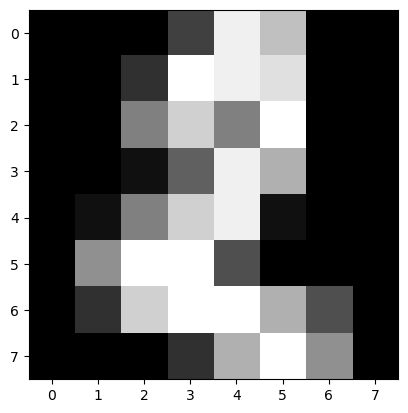

In [8]:
# Test the Similarity Function 
QueryImage = 2
topL1_Image, topL2_Image, topCos_Image, distanceL1, distanceL2, distanceCos = top1Similarity(QueryImage, dataset_flatten, False)
print("The query image is:") 
plt.imshow(digits.images[QueryImage]) 
print("The query id is: ", QueryImage, "; the L1 image id is: ", topL1_Image, "; the L2 image id is: ", topL2_Image, "; the cos image id is: ", topCos_Image)

The most similar image using L1 is (score 7148):


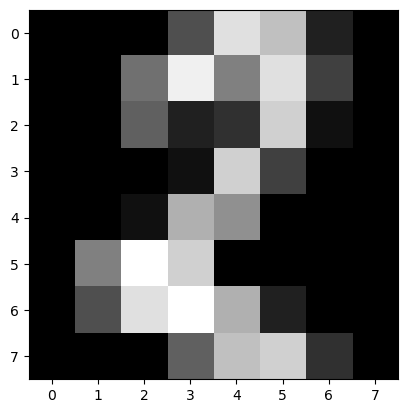

In [9]:
print(f"The most similar image using L1 is (score {distanceL1}):")
plt.imshow(digits.images[topL1_Image])

The most similar image using L2 is (score 264.16661409042587):


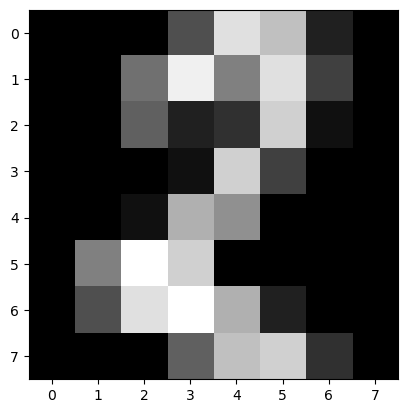

In [10]:
print(f"The most similar image using L2 is (score {distanceL2}):")
plt.imshow(digits.images[topL2_Image])

The most similar image using Cosine is (score 0.32061224028095103):


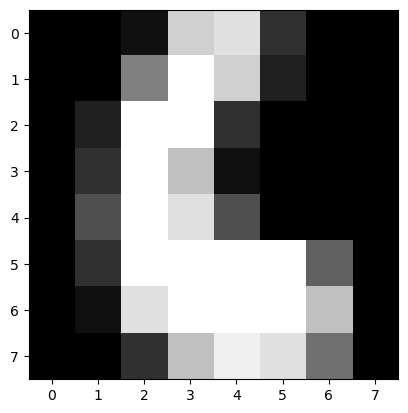

In [11]:
print(f"The most similar image using Cosine is (score {distanceCos}):")
plt.imshow(digits.images[topCos_Image])

## 2. Data Preprocessing

This exercise requires the understanding and preprocessing of the Car Evaluation dataset. You can find the dataset and its description here https://archive-beta.ics.uci.edu/dataset/19/car+evaluation.

The tasks to perform are the following:
1. download the dataset, understand the data and load it with Pandas as a dataframe. Pay attention that you also need to set the name of the columns.
2. How many attributes are in the dataset? What are the types of these attributes?
3. Check the presence of None values.
4. The attributes are encoded as string, transform these ordinal attributes into numbers.
5. Show the data distribution, that is, the histogram of each column. Is there anything relevant to discuss for each attribute?
6. Show the boxplots of the attributes. Discuss the presence of outliers.
7. Remove the outliers (if present) for the numeric attributes by using the IQR method.
8. Select the data about the acceptable and unacceptable cars. Is there imbalanced in the classes? You can compute such a balance by dividing the number of acceptable cars by the total number of samples.
9. Plot the scatter plot divided per classes.
10. Are the classes easly separable?
11. By inspecting the scatter plots, are ther important attributes that allow an easy separation of the classes?
12. Are there correlated features?

#### 1. Download the dataset, understand the data and load it with Pandas as a dataframe.

In [12]:
import pandas as pd
data = pd.read_csv('car.data.csv', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

#### 2. How many attributes are in the dataset? What are the types of these attributes?

In [13]:
print(f'Number of attributes = {data.shape[1]}')
data.info()

Number of attributes = 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### 3. Check the presence of none values

In [14]:
import numpy as np

data = data.replace('?', np.NaN)

print('Number of missing values:')
for col in data.columns:
    print(f'\t{col}: {data[col].isna().sum()}')

Number of missing values:
	buying: 0
	maint: 0
	doors: 0
	persons: 0
	lug_boot: 0
	safety: 0
	class: 0


Si poteva già dedurre che non ci fossero null values osservando lo step 2 perchè nelle info del dataset ogni attributo ha tanti valori non-null tante quante sono le istanze del dataset

#### 4. The attributes are encoded as string, transform these ordinal attributes into numbers.

In [15]:
# Converting Ordinal Variable buying to numeric
data['buying'].replace({'vhigh':4, 'high':3, 'med':2, 'low':1}, inplace=True)
data['maint'].replace({'vhigh':4, 'high':3, 'med':2, 'low':1}, inplace=True)
data['doors'].replace({'5more':5, '4':4, '3':3, '2':2}, inplace=True)
data['persons'].replace({'more':5, '4':4, '2':2}, inplace=True)
data['lug_boot'].replace({'big':3, 'med':2, 'small':1}, inplace=True)
data['safety'].replace({'high':3, 'med':2, 'low':1}, inplace=True)
data['class'].replace({'vgood':4, 'good':3, 'acc':2, 'unacc':1}, inplace=True)

print(data)
data.info()

      buying  maint  doors  persons  lug_boot  safety  class
0          4      4      2        2         1       1      1
1          4      4      2        2         1       2      1
2          4      4      2        2         1       3      1
3          4      4      2        2         2       1      1
4          4      4      2        2         2       2      1
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      5        5         2       2      3
1724       1      1      5        5         2       3      4
1725       1      1      5        5         3       1      1
1726       1      1      5        5         3       2      3
1727       1      1      5        5         3       3      4

[1728 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-nu

Dopo la conversione tutti gli attributi sono di tipo int64 e non più object

#### 5. Show the data distribution, that is, the histogram of each column. Is there anything relevant to discuss for each attribute?

In [16]:
#import matplotlib library
import matplotlib.pyplot as plt

Text(0, 0.5, 'buying')

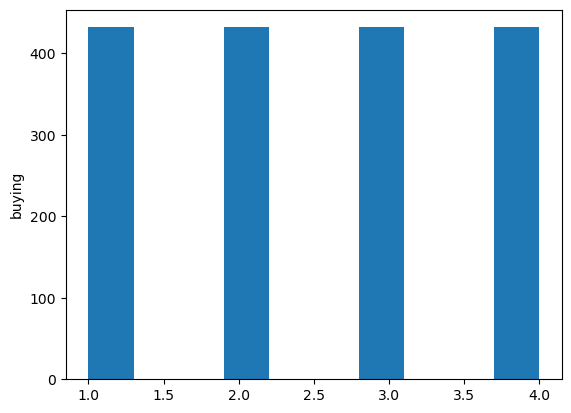

In [17]:
# plot the histogram of the buying column
data['buying'].plot(kind="hist")
plt.ylabel('buying')

Text(0, 0.5, 'maint')

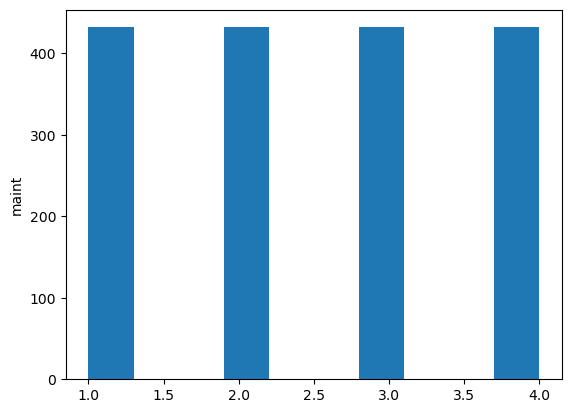

In [18]:
# plot the histogram of the maint column
data['maint'].plot(kind="hist")
plt.ylabel('maint')

Text(0, 0.5, 'doors')

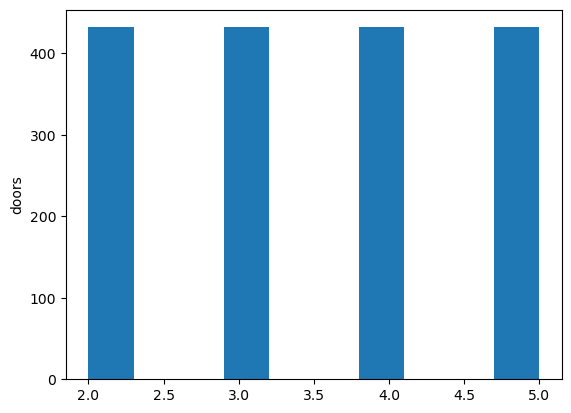

In [19]:
# plot the histogram of the doors column
data['doors'].plot(kind="hist")
plt.ylabel('doors')

Text(0, 0.5, 'persons')

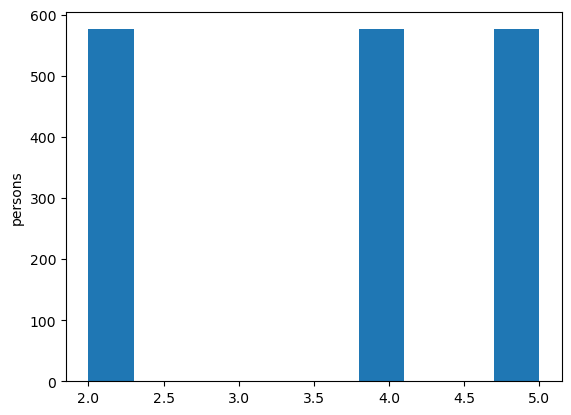

In [20]:
# plot the histogram of the persons column
data['persons'].plot(kind="hist")
plt.ylabel('persons')

Text(0, 0.5, 'lug_boot')

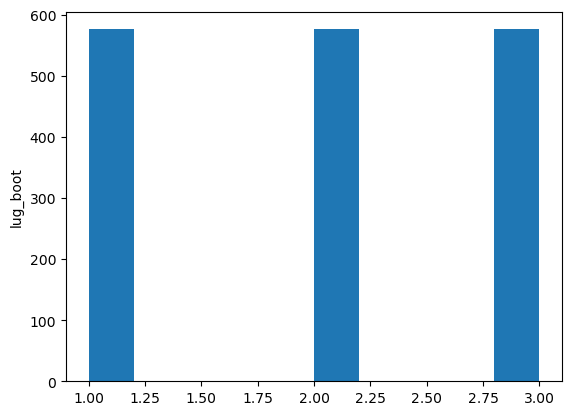

In [21]:
# plot the histogram of the lug_boot column
data['lug_boot'].plot(kind="hist")
plt.ylabel('lug_boot')

Text(0, 0.5, 'safety')

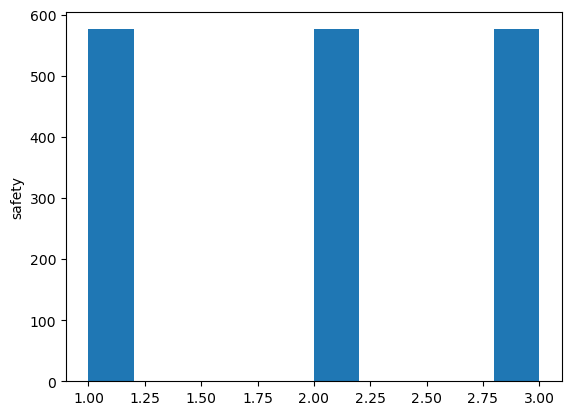

In [22]:
# plot the histogram of the safety column
data['safety'].plot(kind="hist")
plt.ylabel('safety')

Q: Is there anything relevant to discuss for each attribute?

A: Tutti gli attributi sono equamente distribuiti per i possibili valori 

#### 6. Show the boxplots of the attributes. Discuss the presence of outliers.

<Axes: title={'center': 'Box plot'}>

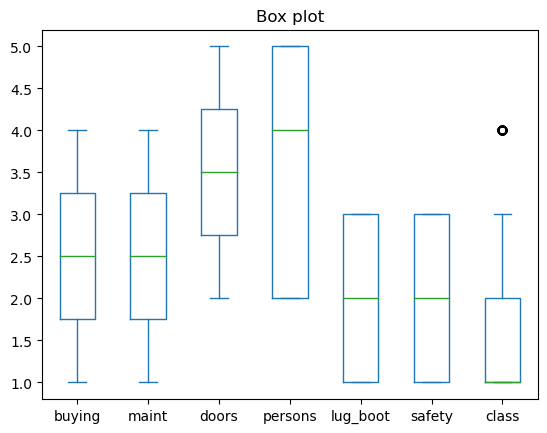

In [23]:
data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']].plot(kind='box', title='Box plot')

##### Discuss the presence of outliers
Solo l'attributo 'class' presenta outliers. Infatti solo una minoranza di istanze rientra nella categoria 'vgood' (sostituita col valore cardinale 4).

#### 7. Remove the outliers (if present) for the numeric attributes by using the IQR method.

      class
0         1
1         1
2         1
3         1
4         1
...     ...
1723      3
1724      4
1725      1
1726      3
1727      4

[1728 rows x 1 columns]
IQR is:  class    1.0
dtype: float64
Num of samples before outlier cleaning: 1728
Num of samples after outlier cleaning: 1663


<Axes: >

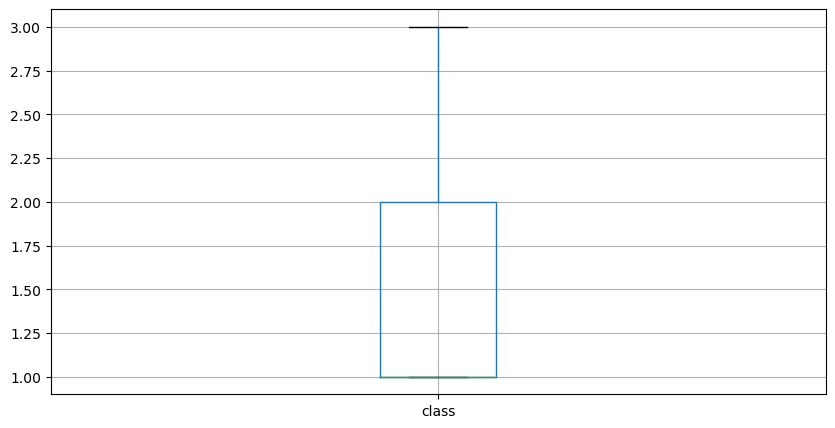

In [24]:
clean_data = data[['class']].copy() #class is the only attribute with outliers
print(clean_data)
   
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1
print('IQR is: ', IQR)

clean_data_no_outliers = clean_data.loc[((Q1 - 1.5*IQR < clean_data).sum(axis=1)==len(clean_data.columns)) & ((clean_data < Q3 + 1.5*IQR).sum(axis=1)==len(clean_data.columns)), :]

print(f"Num of samples before outlier cleaning: {len(clean_data)}")
print(f"Num of samples after outlier cleaning: {len(clean_data_no_outliers)}")
clean_data_no_outliers.boxplot(figsize=(10,5))                                             
                                                         

Abbiamo eseguito la rimozione degli outliers solamente per l'attributo class perchè solamente questo attributo presenta outliers

#### 8. Select the data about the acceptable and unacceptable cars. Is there imbalanced in the classes? You can compute such a balance by dividing the number of acceptable cars by the total number of samples.

In [25]:
acc_data = data[data['class'] == 2] + data[data['class'] == 3] + data[data['class'] == 4]
unacc_data = data[data['class'] == 1]

print(f"Num of acc car: {len(acc_data)}")
print(f"Num of unacc car: {len(unacc_data)}")
answer = str(round(len(acc_data)/len(data), 6))
print(f"Ratio between acc and total number of sample: {answer}")



Num of acc car: 518
Num of unacc car: 1210
Ratio between acc and total number of sample: 0.299769


Note: abbiamo considerato anche i valori good e vgood nella classe dei dati accurate

Q: Is there imbalanced in the classes?

A: Osserviamo un disequilibrio tra le due classi di dati. Per risolvere questo problema possiamo eseguire oversampling sulla classe di 'acc car' oppure undersampling sulla classe di 'unacc car'

#### 9. Plot the scatter plot divided per classes.

In [26]:
import matplotlib.pyplot as plt

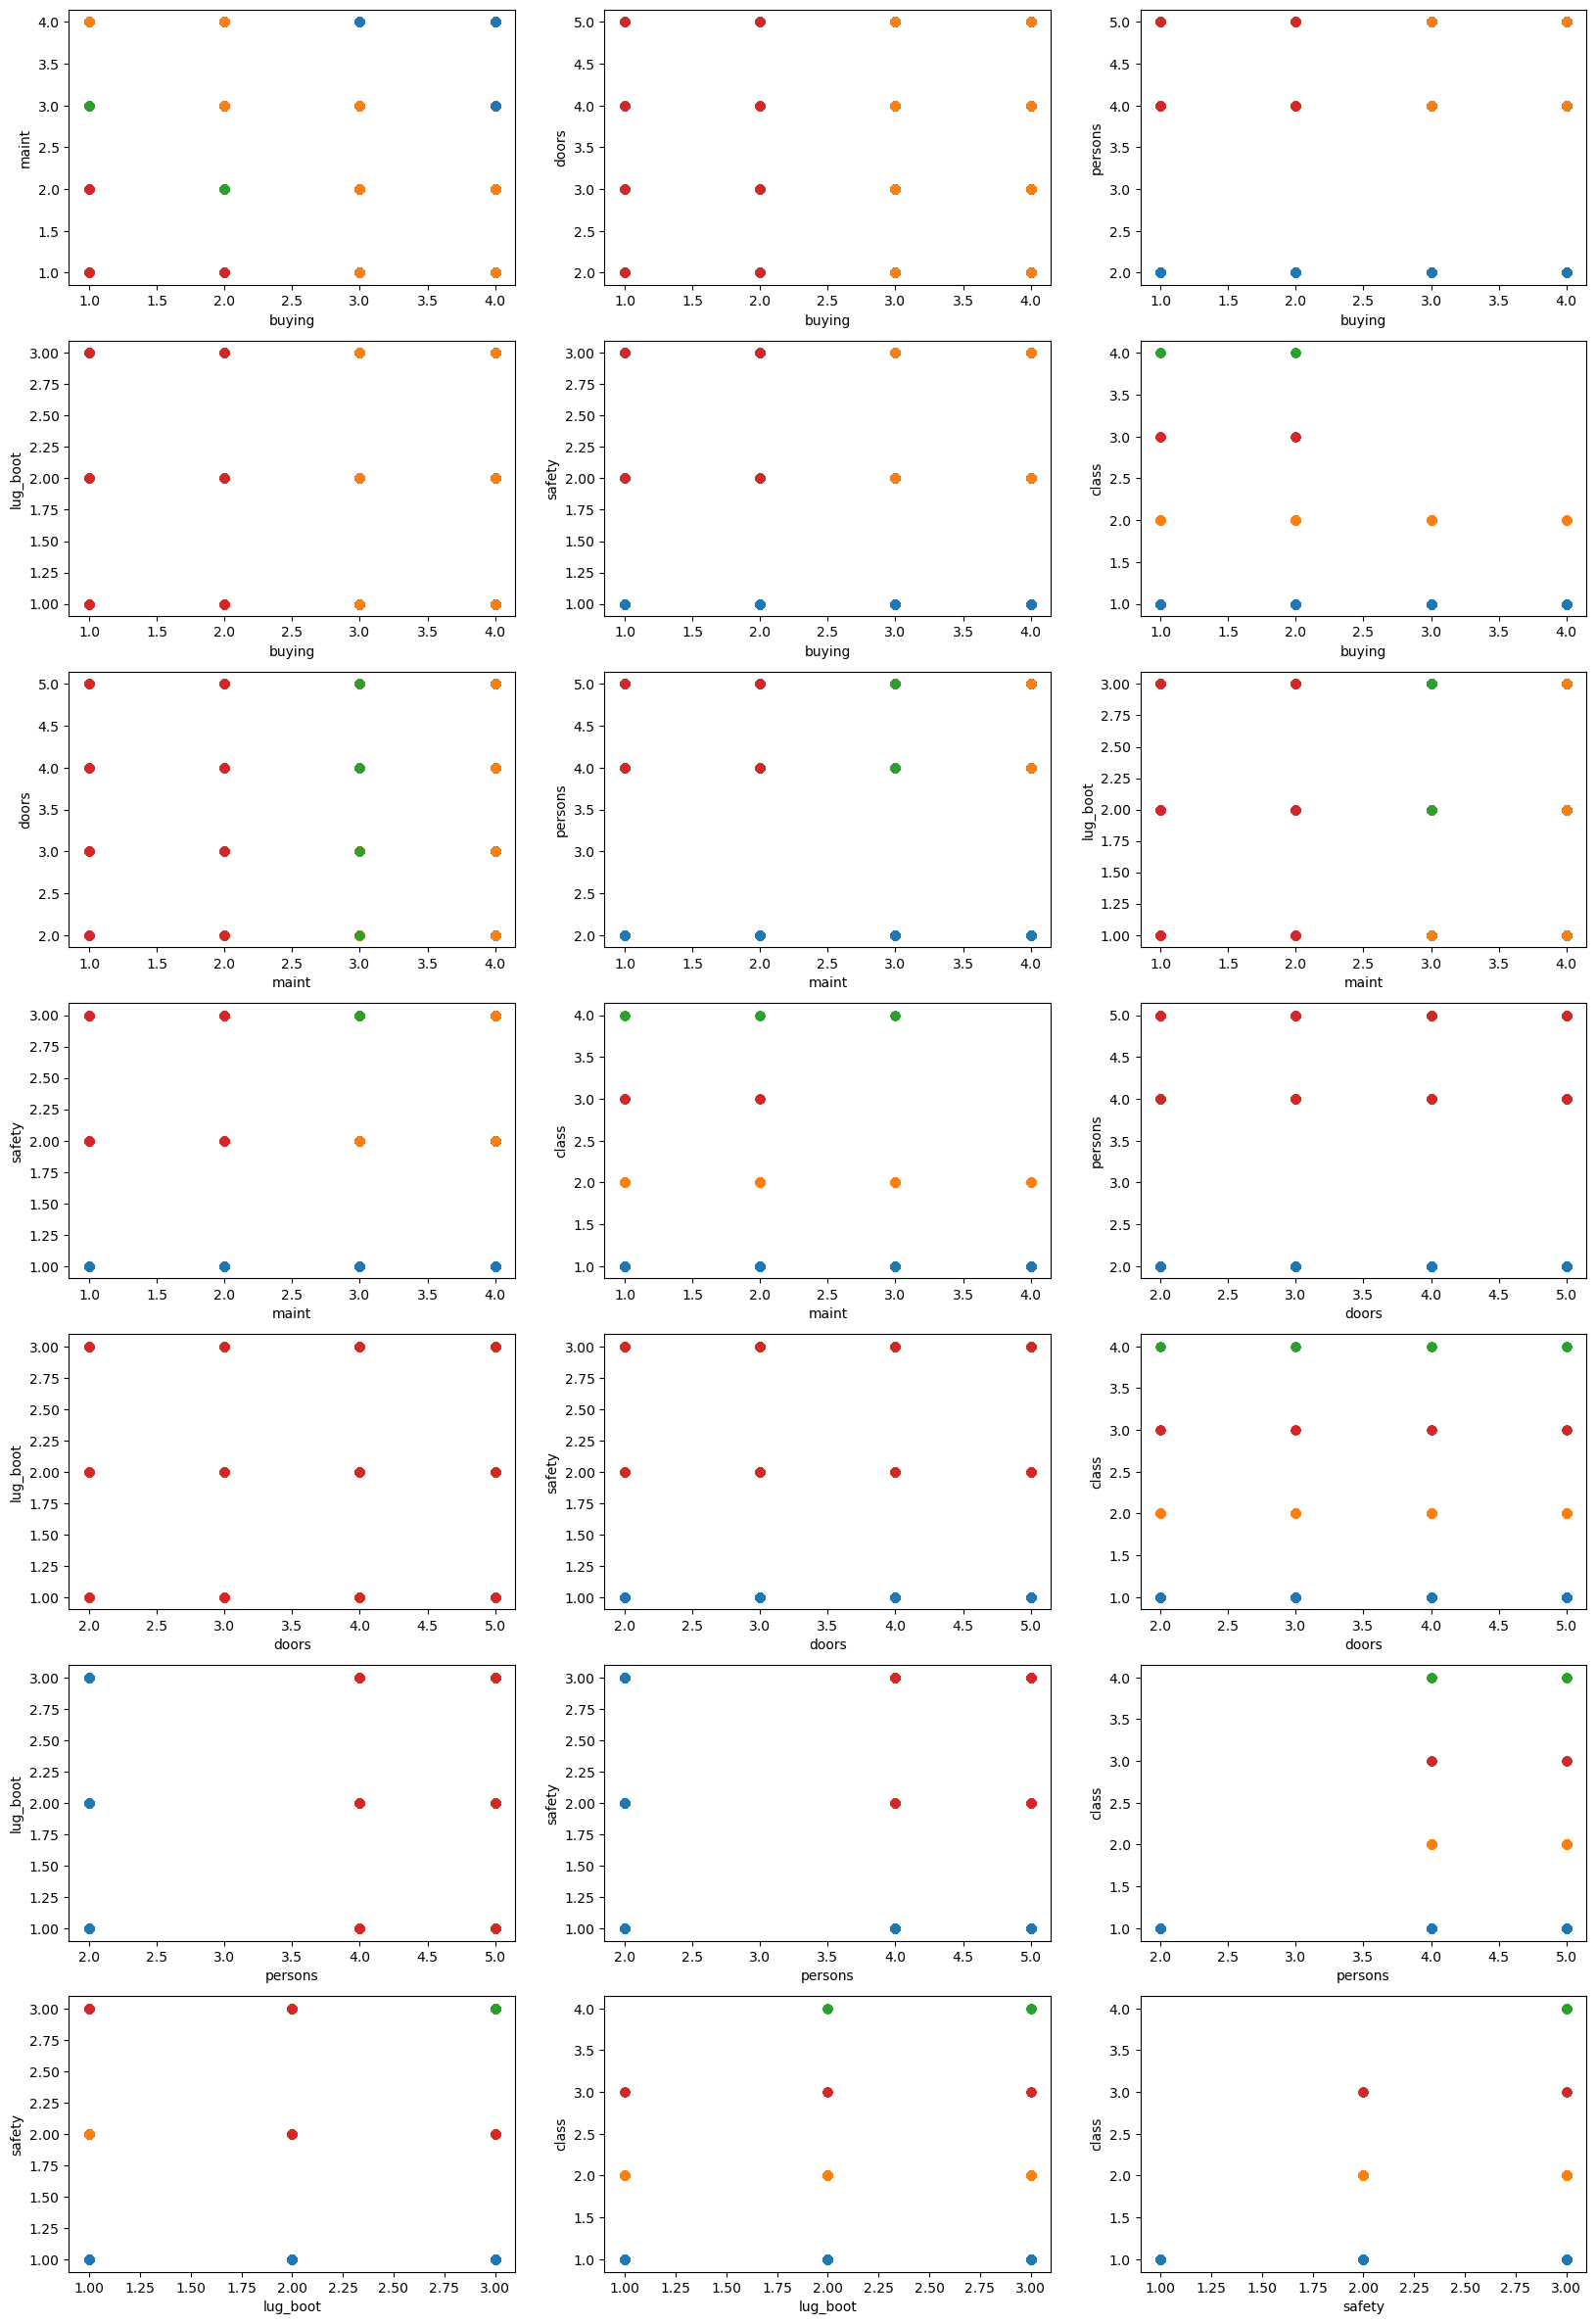

In [27]:
index = 0 # number of cell we are going to fill, from 0 to (num_attr^2 - num_attr)/2 = 21 

# the number of rows x number of cols must results in the total number of cells
num_rows = 7
num_cols = 3

#this is index of each pair of attributes and goes from 0 to 7
num_attrs = len(data.columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,30))

for i in range(num_attrs): 
    
    for j in range(i + 1, num_attrs): 
        # ax1 represent the col of axes that we are going to fill and ax2 the row
        ax1 = int(index/num_cols) # from 0 to 6
        ax2 = index % num_cols # either 0, 1 or 2
        for class_name in data['class'].unique():
            
            # boolean mask for selecting samples of a given class
            class_df = data[data['class'] == class_name]
            
            # scatter plot for each couple (i, j) of features
            axes[ax1][ax2].scatter(class_df.iloc[:, i], class_df.iloc[:, j]) 
            
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

#### 10.  Are the classes easly separable?

Generalmente le classi sono facilmente separabili perchè raggruppabili chiaramente in base al valore dell'attributo sulle ascisse o sulle ordinate.

#### 11. By inspecting the scatter plots, are ther important attributes that allow an easy separation of the classes?

Tutte le coppie di attributi permettono di separare le classi. 

Generalmente si viene a creare una separazione lineare tranne nei caso di:
- buying e maint
- maint e lug_boot
- maint e safety
- person e safety
- lug_boot e safety

Solamente alcune coppie di attributi permettono di individuare e separare 4 classi:
- buying e maint
- buying e class
- maint e persons
- maint e safety
- maint e class
- doors e class
- persons e class
- lug_boot e safety
- lug_boot e class
- safety e class

Negli altri casi invece si possono individuare:
- 1 classe:
    - doors e lug_boot 1
- 2 classi:
    - buying e doors 
    - buying e lug_boot 
    - doors e persons 
    - doors e safety 
    - persons e lug_boot 
    - persons e safety 
- 3 classi:
    - buying e persons 
    - buying e safety 
    - maint e doors 
    - maint e lug_boot

#### 12. Are there correlated features?

Non si osserva nessuna correlazione tra le features